In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from scipy.stats import boxcox

In [ ]:
import pickle
from scipy import stats


In [ ]:
model_path = '/content/drive/MyDrive/Colab Notebooks/Wine Quality Classification/model/'

In [ ]:
RANDOM_STATE = 39

In [ ]:
data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Wine Quality Classification/WineQT.csv")

In [ ]:
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
data_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [ ]:
data_df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [ ]:
data_df.drop(["Id"], axis = 1, inplace = True)

In [ ]:
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
def wineQualityTransform(quality):
    wine_quality_transformation = {3: 0, 4: 0, 5:1, 6:2, 7: 3, 8: 3}
    return wine_quality_transformation[quality]

data_df["quality"] = data_df["quality"].apply(wineQualityTransform)
print(data_df.quality.value_counts())


1    483
2    462
3    159
0     39
Name: quality, dtype: int64


[Text(0, 0, '39'), Text(0, 0, '483'), Text(0, 0, '462'), Text(0, 0, '159')]

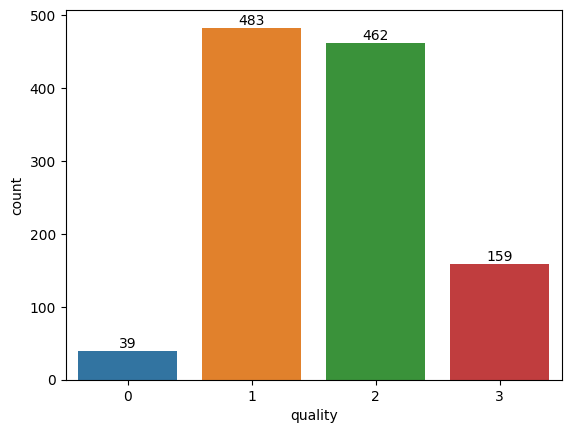

In [ ]:
ax = sns.countplot(x = "quality", data = data_df)
ax.bar_label(ax.containers[0])

So, we still have highly imbalanced data. For the handling of imbalanced data, we are going to use various methods like oversampling, undersampling, smote and class weights.

In [ ]:
from sklearn.model_selection import train_test_split

X = data_df.drop("quality", axis = 1)
y = data_df.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify = y)

In [ ]:
def qualityBarplot(qualitySeries):
    count_calc = qualitySeries.value_counts()
    print(count_calc)
    f, ax = plt.subplots(1, 1, figsize = (10, 5))
    g = sns.barplot(x = count_calc.index, y = count_calc, ax = ax)
    g.set(xlabel = "quality", ylabel = "count")
    g.bar_label(g.containers[0])

1    386
2    370
3    127
0     31
Name: quality, dtype: int64
1    97
2    92
3    32
0     8
Name: quality, dtype: int64


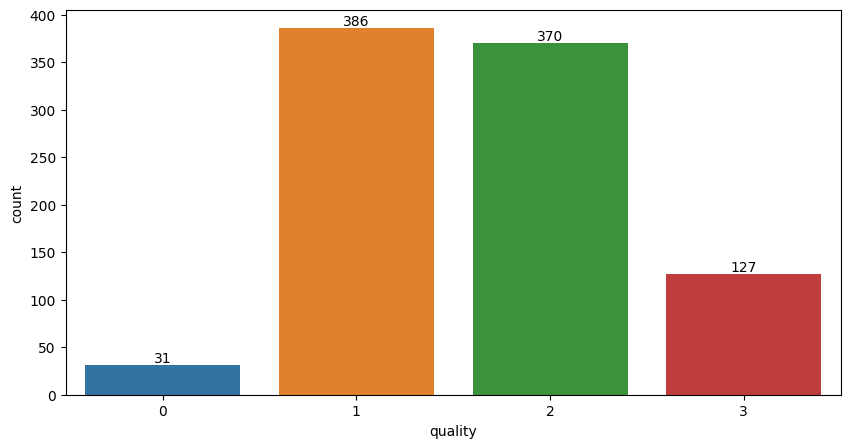

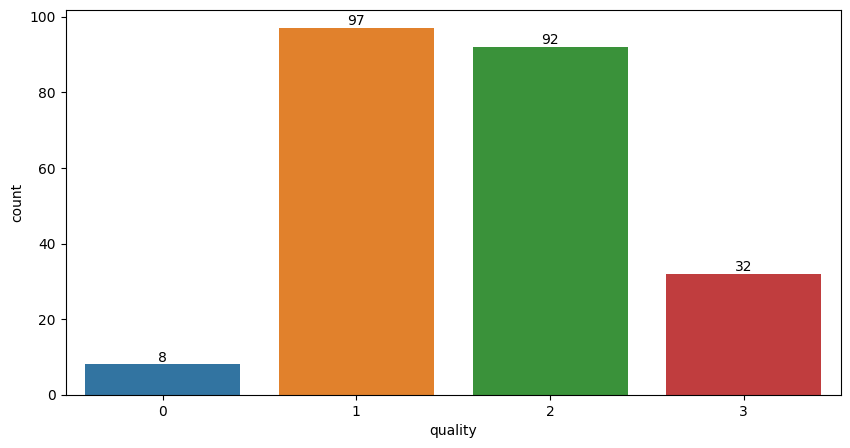

In [ ]:
qualityBarplot(y_train)
qualityBarplot(y_test)

In [ ]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()

In [ ]:
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
Counter(y_smote)

Counter({2: 386, 1: 386, 3: 386, 0: 386})

## Min max Scaling and log transformation

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_smote)

MinMaxScaler()

In [ ]:
fileName = "min_max_scaler_boosting.pkl"
with open(model_path + fileName, 'wb') as f:
  pickle.dump(scaler, f)

In [ ]:
def scaleAndTransform(data, scaler):
  data = scaler.transform(data)
  return np.log(data + 0.0001)

In [ ]:
X_train_transformed = scaleAndTransform(X_smote, scaler)
X_test_transformed = scaleAndTransform(X_test, scaler)

In [ ]:
X_train_transformed

array([[-0.66675   , -1.36141309, -0.6929472 , ..., -1.26031543,
        -1.12870055, -0.77297325],
       [-0.81513884, -1.42807756, -0.99398204, ..., -0.93191011,
        -1.98177377, -1.12955536],
       [-0.73819453, -1.42807756, -0.7982855 , ..., -0.99376931,
        -2.34436188, -0.64783559],
       ...,
       [-1.07931081, -1.5259663 , -1.25214394, ..., -0.7827999 ,
        -1.26480904, -0.63613858],
       [-0.96047348, -1.90474679, -0.98566333, ..., -0.88846666,
        -1.27629698, -0.65129849],
       [-0.74480604, -1.74197224, -0.81644341, ..., -0.83835218,
        -1.27344413, -0.68608098]])

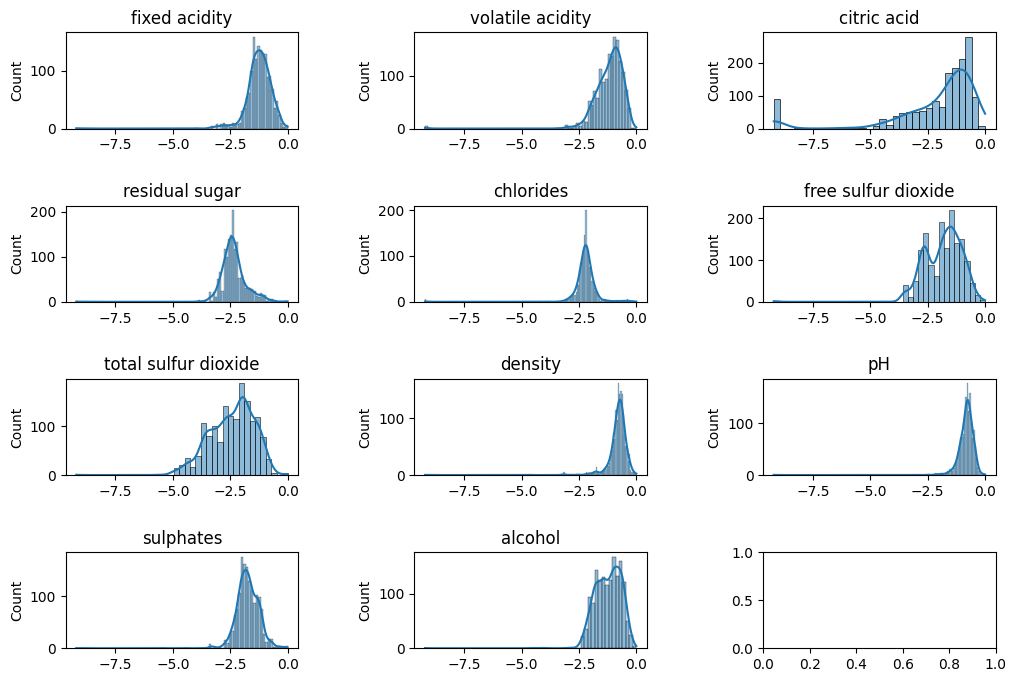

In [ ]:
## distribution plot of the log transformed data
column_names = data_df.columns
NUM_ROWS = 4
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(12, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS): 
    if row == 3 and col == 2:
      continue  
    ax = axs[row][col]
    sns.histplot(X_train_transformed[:, NUM_COLS * row + col], ax = ax, kde = True)
    ax.set_title(column_names[NUM_COLS * row + col])

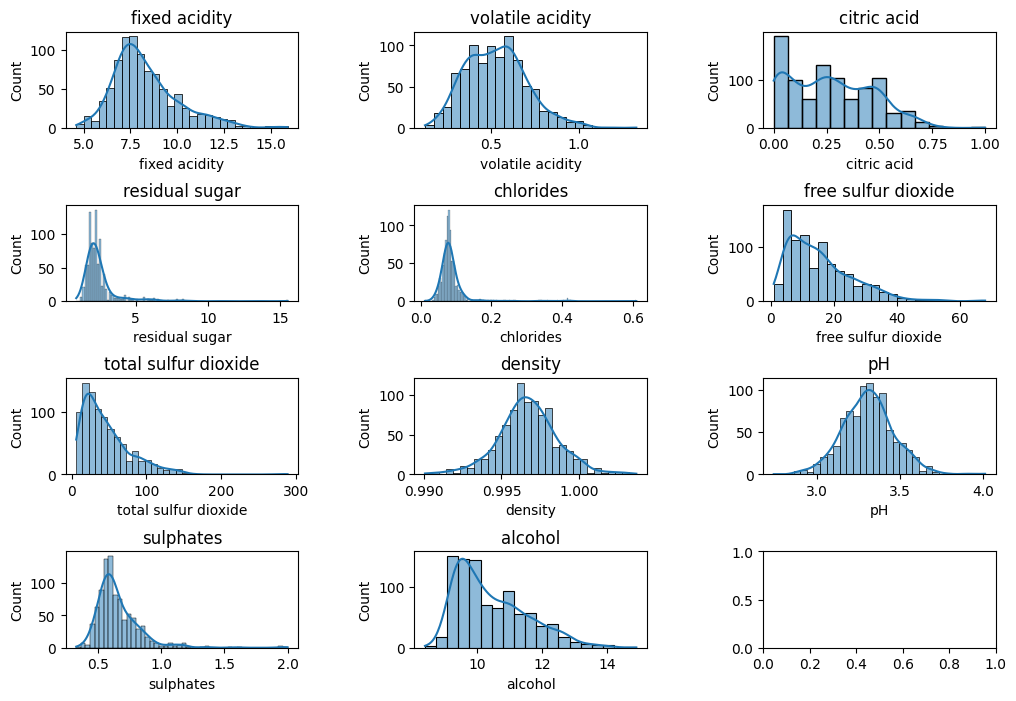

In [ ]:
## distribution plot of the training data
column_names = data_df.columns
NUM_ROWS = 4
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(12, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS): 
    if row == 3 and col == 2:
      continue  
    ax = axs[row][col]
    sns.histplot(X_train[column_names[NUM_COLS * row + col]], ax = ax, kde = True)
    ax.set_title(column_names[NUM_COLS * row + col])

## XGBClassifier

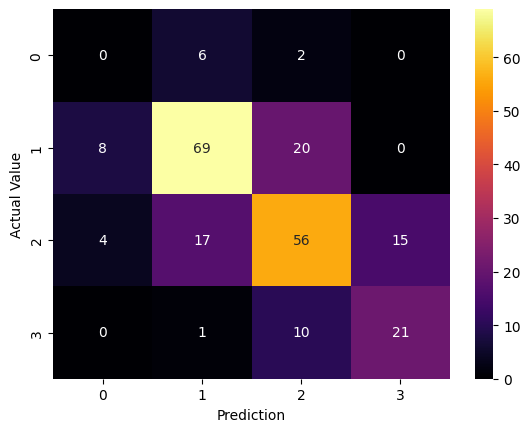


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.74      0.71      0.73        97
           2       0.64      0.61      0.62        92
           3       0.58      0.66      0.62        32

    accuracy                           0.64       229
   macro avg       0.49      0.49      0.49       229
weighted avg       0.65      0.64      0.64       229



In [82]:
xgbv1 = XGBClassifier()
xgbv1.fit(X_train_transformed, y_smote)

y_pred = xgbv1.predict(X_test_transformed)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

In [86]:
y_pred

array([1, 3, 1, 1, 3, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 3, 1, 2, 2, 3, 2,
       1, 1, 1, 2, 3, 2, 2, 1, 2, 2, 1, 0, 1, 2, 3, 2, 1, 1, 1, 1, 1, 3,
       3, 2, 3, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 3, 2, 2, 2, 1, 3, 1, 1, 2,
       0, 3, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 3, 2, 1, 1,
       2, 2, 2, 0, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 3, 0, 2, 3, 1, 2, 1, 1, 1, 1, 2, 1, 3, 2, 1, 2, 2, 1, 2,
       1, 1, 3, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 2, 3, 3, 1, 2, 3, 3, 1, 0,
       1, 3, 3, 2, 1, 1, 1, 3, 1, 2, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2, 1, 2,
       1, 1, 3, 1, 3, 2, 2, 2, 2, 2, 3, 2, 1, 1, 0, 2, 2, 3, 0, 1, 1, 1,
       2, 1, 2, 2, 3, 1, 1, 1, 2])

In [83]:
fileName = "xg_boosting_model.pkl"
xgbv1.save_model(model_path + fileName)

In [88]:
## Use for the custom data
with open(model_path + 'min_max_scaler_boosting.pkl', 'rb') as f:
  min_max_scaler = pickle.load(f)

## loading the xgb model
xgb_model = XGBClassifier()
xgb_model.load_model(model_path + fileName)

custom_data = X_test.iloc[9].values
print(custom_data)
custom_data = np.expand_dims(custom_data, axis = 0)
scaled_custom_data = scaleAndTransform(custom_data, min_max_scaler)
print(scaled_custom_data)
custom_data_pred = xgb_model.predict_proba(scaled_custom_data) 
print(custom_data_pred)


[10.8     0.26    0.45    3.3     0.06   20.     49.      0.9972  3.13
  0.54    9.6   ]
[[-0.60007119 -2.1558693  -0.7982855  -1.80494464 -2.52114469 -1.25990107
  -1.88358886 -0.64703706 -1.18029985 -2.07267645 -1.6889391 ]]
[[0.69818956 0.2256632  0.06075047 0.01539675]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## AdaBoostClassifier

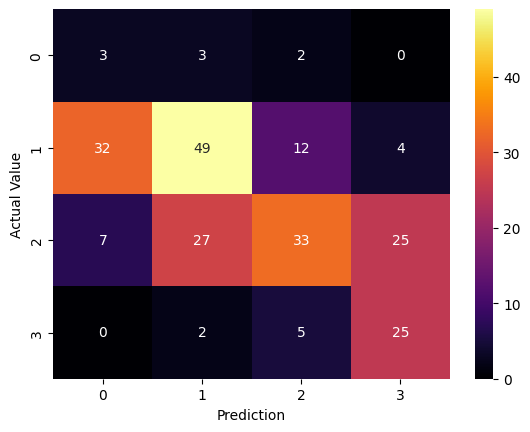


              precision    recall  f1-score   support

           0       0.07      0.38      0.12         8
           1       0.60      0.51      0.55        97
           2       0.63      0.36      0.46        92
           3       0.46      0.78      0.58        32

    accuracy                           0.48       229
   macro avg       0.44      0.51      0.43       229
weighted avg       0.58      0.48      0.50       229



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train_transformed, y_smote) 

y_pred = ada.predict(X_test_transformed)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

## GradientBoostingClassifier

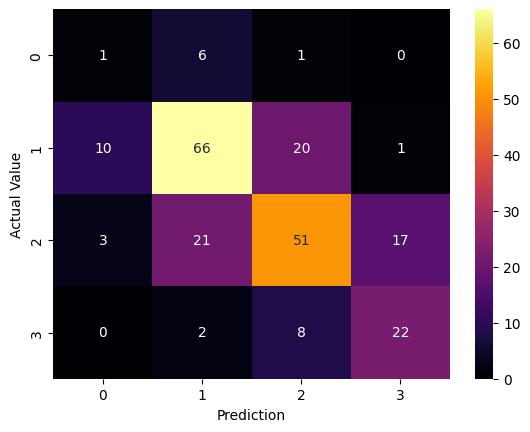


              precision    recall  f1-score   support

           0       0.07      0.12      0.09         8
           1       0.69      0.68      0.69        97
           2       0.64      0.55      0.59        92
           3       0.55      0.69      0.61        32

    accuracy                           0.61       229
   macro avg       0.49      0.51      0.50       229
weighted avg       0.63      0.61      0.62       229



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train_transformed, y_smote) 

y_pred = gbc.predict(X_test_transformed)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

In [ ]:
fileName = "gradient_boosting_model.pkl"
with open(model_path + fileName, 'wb') as f:
  pickle.dump(gbc, f)

## LGBMClassifier

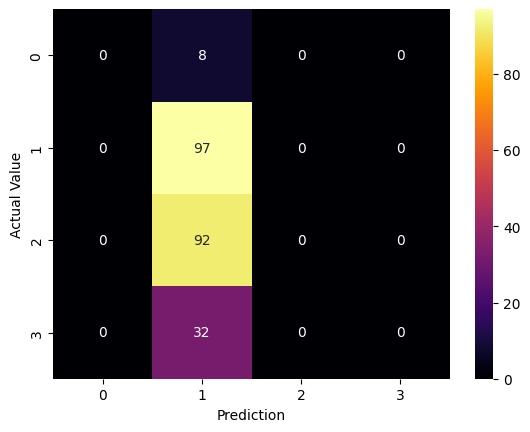


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.42      1.00      0.60        97
           2       0.00      0.00      0.00        92
           3       0.00      0.00      0.00        32

    accuracy                           0.42       229
   macro avg       0.11      0.25      0.15       229
weighted avg       0.18      0.42      0.25       229



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train_transformed, y_smote)  
y_pred = lgbm.predict(X_test) 


cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

## CatBoostClassifier

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Learning rate set to 0.080899
0:	learn: 1.3313314	total: 66.1ms	remaining: 1m 6s
1:	learn: 1.2914854	total: 101ms	remaining: 50.5s
2:	learn: 1.2476849	total: 120ms	remaining: 39.7s
3:	learn: 1.2104012	total: 170ms	remaining: 42.2s
4:	learn: 1.1762238	total: 182ms	remaining: 36.2s
5:	learn: 1.1445649	total: 222ms	remaining: 36.7s
6:	learn: 1.1156692	total: 252ms	remaining: 35.8s
7:	learn: 1.0892586	total: 275ms	remaining: 34.1s
8:	learn: 1.0654309	total: 327ms	remaining: 36s
9:	learn: 1.0470143	total: 354ms	remaining: 35s
10:	learn: 1.0286276	total: 365ms	remaining: 32.9s
11:	learn: 1.0080344	total: 379ms	remaining: 31.2s
12:	learn: 0.9887378	total: 391ms	remaining: 29.7s
13:	learn: 0.9744550	total: 408ms	remaining: 28.8s
14:	learn: 0.9575496	total: 437ms	remaining: 28.7s
15:	learn: 0.9447543	total: 478ms	remaining: 29.4s
16:	learn: 0.9299232	total: 504ms	remaining: 29.2s
17:	learn: 0.9144639	total: 527ms	remaining: 28.8s
18:	learn: 0.9024582	total: 568ms	remaining: 29.3s
19:	learn: 0.8

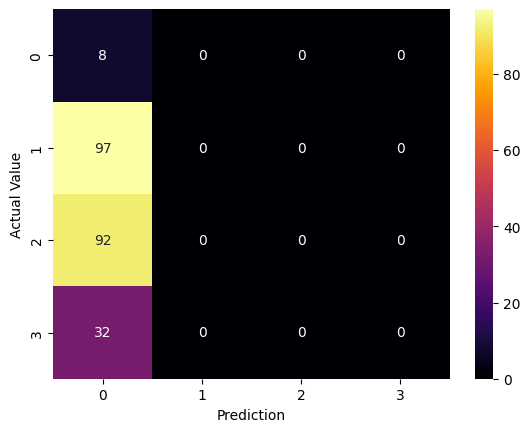


              precision    recall  f1-score   support

           0       0.03      1.00      0.07         8
           1       0.00      0.00      0.00        97
           2       0.00      0.00      0.00        92
           3       0.00      0.00      0.00        32

    accuracy                           0.03       229
   macro avg       0.01      0.25      0.02       229
weighted avg       0.00      0.03      0.00       229



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier()
cbc.fit(X_train_transformed, y_smote) 
y_pred = cbc.predict(X_test)


cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))